# 导入模块

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from toad import quality
from toad.detector import detect
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.width", 10000)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# 加载数据

In [2]:
train = pd.read_csv("../data/cs-training.csv", encoding="utf-8")
train.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
test = pd.read_csv("../data/cs-test.csv", encoding="utf-8")
test.rename(columns={"Unnamed: 0": "Id"}, inplace=True)

In [3]:
train.columns = ["id", "y", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]
test.columns = ["id", "y", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]

# 数据探索

## 查看前五行

### 训练集

In [4]:
train.head()

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 测试集

In [5]:
test.head()

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## 查看数据类型、大小和唯一值

### 训练集

In [6]:
detect(train).iloc[:, :4]

,type,size,missing,unique
id,int64,150000,0.00%,150000
y,int64,150000,0.00%,2
x1,float64,150000,0.00%,125728
x2,int64,150000,0.00%,86
x3,int64,150000,0.00%,16
x4,float64,150000,0.00%,114194
x5,float64,150000,19.82%,13594
x6,int64,150000,0.00%,58
x7,int64,150000,0.00%,19
x8,int64,150000,0.00%,28


### 测试集

In [7]:
detect(test).iloc[:, :4]

,type,size,missing,unique
id,int64,101503,0.00%,101503
y,float64,101503,100.00%,0
x1,float64,101503,0.00%,85716
x2,int64,101503,0.00%,82
x3,int64,101503,0.00%,16
x4,float64,101503,0.00%,79878
x5,float64,101503,19.81%,11976
x6,int64,101503,0.00%,56
x7,int64,101503,0.00%,18
x8,int64,101503,0.00%,24


## 数据形状

### 训练集

In [8]:
train.shape

(150000, 12)

### 测试集

In [9]:
test.shape

(101503, 12)

## 描述性统计

### 训练集

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
y,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
x1,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
x2,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
x3,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
x4,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
x5,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
x6,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
x7,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
x8,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


### 测试集

In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101503.0,50752.000000,29301.536524,1.0,25376.500000,50752.000000,76127.500000,101503.0
y,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
x2,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
x3,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
x4,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
x5,81400.0,6855.035590,36508.600375,0.0,3408.000000,5400.000000,8200.000000,7727000.0
x6,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
x7,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
x8,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0


## 相关性分析

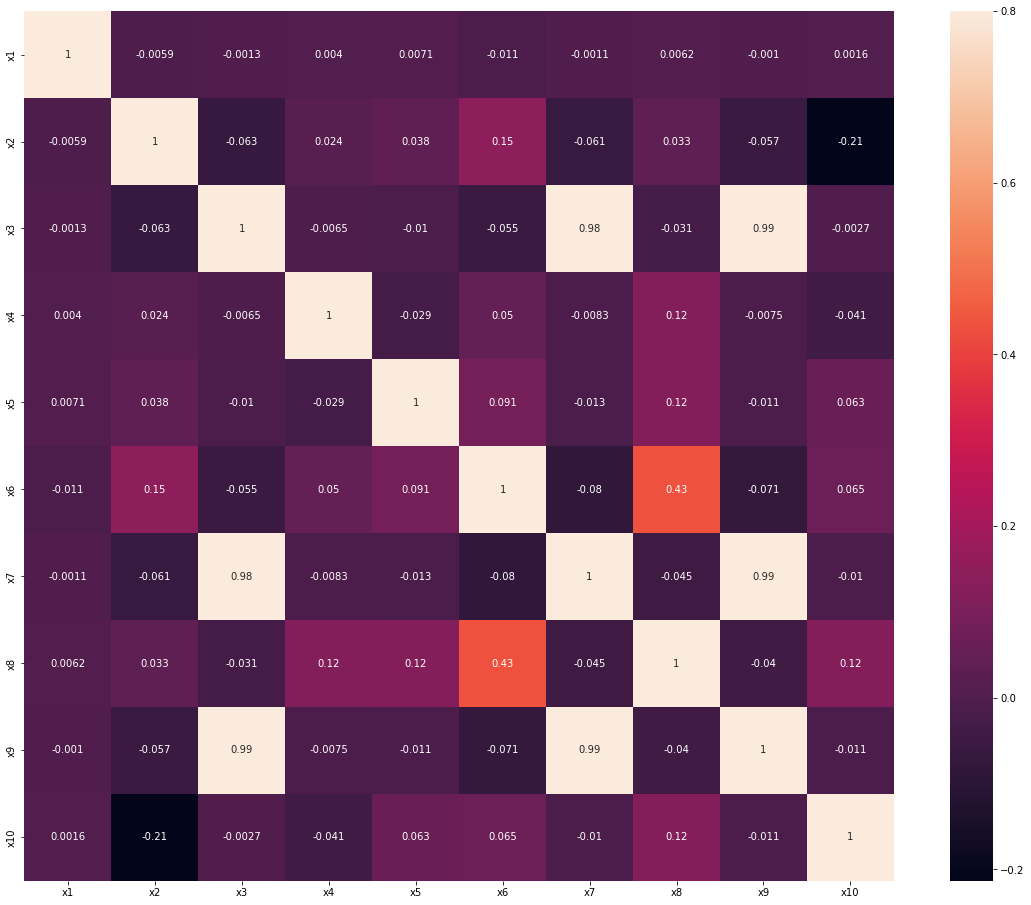

In [12]:
plt.figure(figsize=(20, 16))
plt.yticks(rotation=45)
heat = sns.heatmap(train.iloc[:, 2:].corr(), vmax=.8, square=True, annot=True)
plt.savefig(r"D:\liangkaimeng\picture\user_credit_score\heatmap.png", bbox_inches='tight', dpi=300)

In [13]:
train.iloc[:, 1:].corr()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
y,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
x1,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
x2,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
x3,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
x4,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
x5,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
x6,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
x7,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
x8,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
x9,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


## 变量信息量

In [15]:
quality(train, target="y", iv_only=False)

,iv,gini,entropy,unique
x1,1.163142,0.116037,0.245387,125728.0
x7,0.880725,0.110360,0.243960,19.0
x3,0.761485,0.122652,0.243960,16.0
x9,0.601348,0.119316,0.243960,13.0
x2,0.264446,0.123396,0.245383,86.0
x6,0.111157,0.124742,0.245387,58.0
x4,0.093587,0.124584,0.245387,114194.0
x5,0.093006,0.124267,0.245387,13595.0
x8,0.065721,0.124635,0.245386,28.0
x10,0.036456,0.124722,0.245366,14.0


## 数据分布

<AxesSubplot:xlabel='x1', ylabel='Density'>

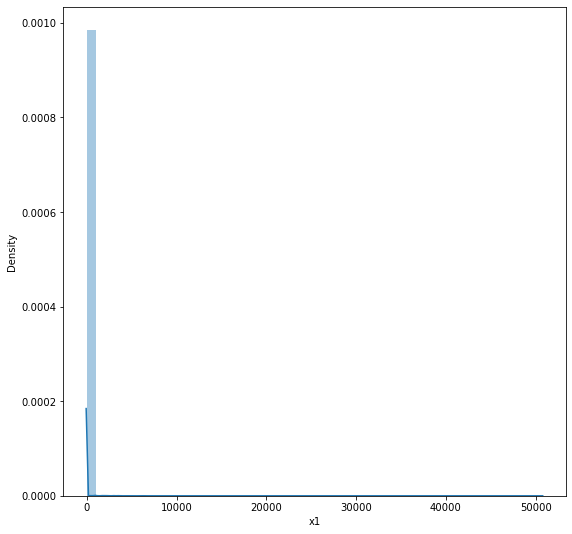

In [21]:
plt.figure(figsize=(9, 9))
sns.distplot(train["x1"])

In [16]:
train.head()

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
